### Logistic Regression

In [177]:
import pandas as pd
import numpy as np

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
train = pd.read_csv('titanic_train.csv')

In [180]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
sns.set_style('whitegrid')

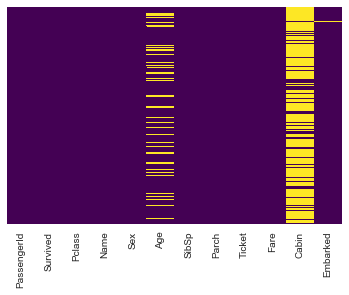

In [182]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

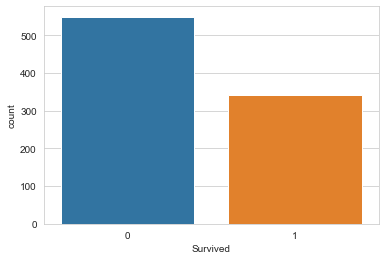

In [183]:
sns.countplot(x='Survived', data=train)

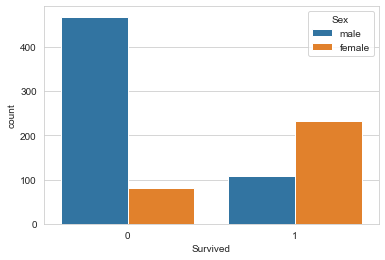

In [184]:
sns.countplot(x='Survived', data=train, hue='Sex')

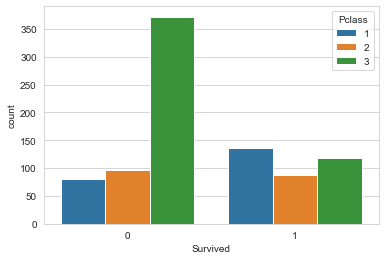

In [185]:
sns.countplot(x='Survived', data=train, hue='Pclass')

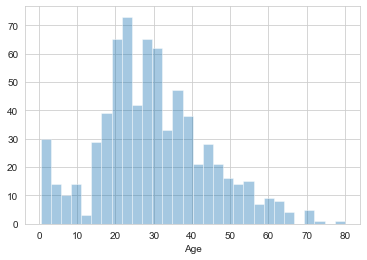

In [186]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


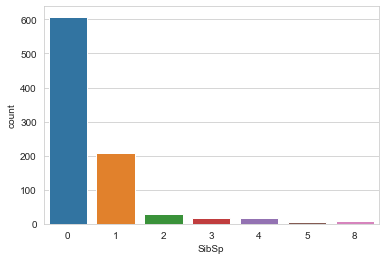

In [188]:
sns.countplot(x='SibSp', data=train)

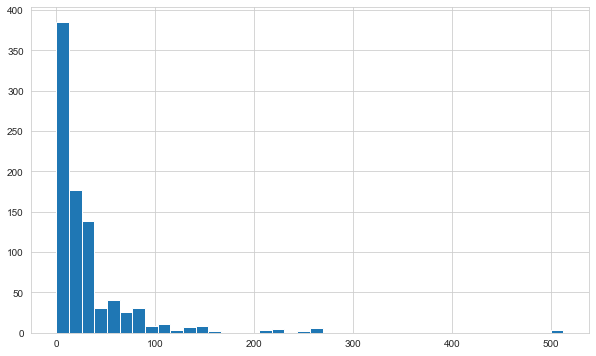

In [189]:
train['Fare'].hist(bins=40, figsize=(10,6))

In [190]:
import cufflinks as cf

In [191]:
cf.go_offline()

In [192]:
train['Fare'].iplot(kind='hist', bins=40)

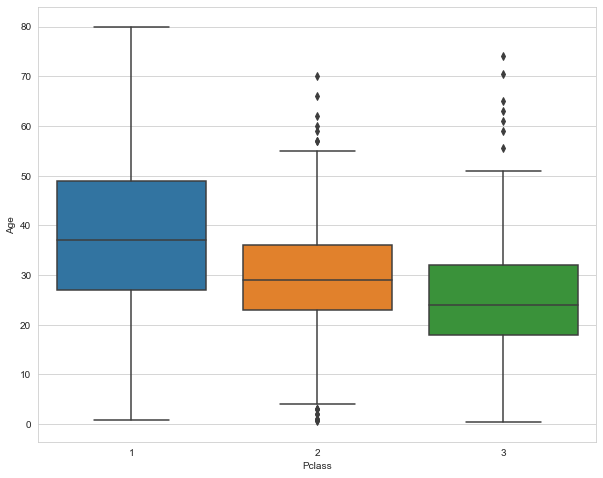

In [193]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data=train)

In [194]:
def impute_age(data):
    age = data[0]
    pclass = data[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [195]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [196]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

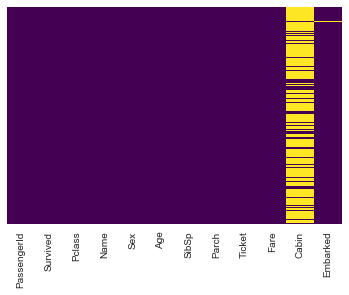

In [197]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [198]:
train.shape

(891, 12)

In [199]:
train.drop('Cabin', inplace=True, axis=1)

In [200]:
train.dropna(inplace=True)

In [201]:
train.shape

(889, 11)

In [202]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [203]:
train['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [204]:
def fetch_class_mapping(x):
    if x == 1:
        return "First_Class"
    elif x == 2:
        return "Second_Class"
    elif x==3:
        return "Third_Class"
    



train['Pclass'] = train['Pclass'].apply(fetch_class_mapping)

In [205]:
train['Pclass'].value_counts()

Third_Class     491
First_Class     214
Second_Class    184
Name: Pclass, dtype: int64

In [206]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [207]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [208]:
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [209]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [210]:
train = pd.concat([train, sex, embarked, pclass], axis=1)

In [211]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Second_Class,Third_Class
0,1,0,Third_Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,First_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,Third_Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,First_Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,Third_Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [212]:
train.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Embarked', 'Pclass'], axis=1, inplace=True)

In [213]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,Second_Class,Third_Class
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [214]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
logmodel = LogisticRegression(solver='liblinear')

In [219]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
predictions = logmodel.predict(X_test)

In [221]:
from sklearn.metrics import classification_report

In [222]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [223]:
from sklearn.metrics import confusion_matrix

In [224]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 36,  68]])